In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as pkl



In [3]:
SAVE_FIGURES=False

In [4]:
def make_model_name(propIn, model_number, semi_sup_percent):
    if propIn=="h":
        prop="hydrophobicity"
    elif propIn=="c":
        prop="chargepH7p2"
    elif propIn=="b":
        prop="boman"
    elif propIn=="bc":
        prop="boman-chargepH7p2"
    elif propIn=="bch":
        prop='bch'
    else:
        prop=propIn
    
    if (semi_sup_percent==100): # don't think this one is correct
        percent = ""
        suffix="dPP64-ZScore"
    elif (semi_sup_percent=='0'):
        if prop in ["log10mic", 'predicted-log10mic']:
            percent="0-"
        else:
            percent = ""
        
        suffix  = "cdhit90-zScoreNormalized"
    else:
        percent = str(semi_sup_percent)+"-"
        suffix="cdhit90-zScoreNormalized"

    model_name=f"transvae-64-peptides-{prop}-zScoreNormalized-{percent}organized-{suffix}"

    return model_name

In [5]:
make_model_name("h",100,"25")


'transvae-64-peptides-hydrophobicity-zScoreNormalized-25-organized-cdhit90-zScoreNormalized'

In [6]:
model_name= 'transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized'
os.listdir('analysis/'+model_name,)

['pca_correlations_transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_test_set.txt',
 'mu_transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_train.npy',
 'predicted_vs_true_hydrophobicity.png',
 'boloop_results',
 'pca_projection_transvae-64-hydrophobicity-50-coloredByhydrophobicity_test.png',
 'pca_correlations_transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_train_set.txt',
 'latent_to_pca_distortions.csv',
 'pca_projection_transvae-64-hydrophobicity-50-coloredByhydrophobicity_train.png',
 'pca_projection_transvae-64-hydrophobicity-50-coloredByhydrophobicity.png',
 'z_transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_train.npy',
 'logvar_transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_test.npy',
 'pca_explained_var_and_sing_vals_test.txt',
 'logvar_transvae-64-peptides-hydrophobici

In [7]:
mu_train = np.load(f'analysis/{model_name}/mu_{model_name}_train.npy')
mu_test  = np.load(f'analysis/{model_name}/mu_{model_name}_test.npy')


In [8]:
mu_train.shape

(523848, 64)

did not find: analysis/transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized/mu_transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized_train.npy
did not find: analysis/transvae-64-peptides-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized/mu_transvae-64-peptides-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized_train.npy
did not find: analysis/transvae-64-peptides-hydrophobicity-zScoreNormalized-organized-cdhit90-zScoreNormalized/mu_transvae-64-peptides-hydrophobicity-zScoreNormalized-organized-cdhit90-zScoreNormalized_train.npy
did not find: analysis/transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized/mu_transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized_train.npy
did not find: analysis/transvae-64-peptides-bch-zScoreNormalized-organized-cdhit90-zScoreNormalized/mu_transvae-64-peptides-bch-zScoreNormalized-organized-cdhit90-zScoreN

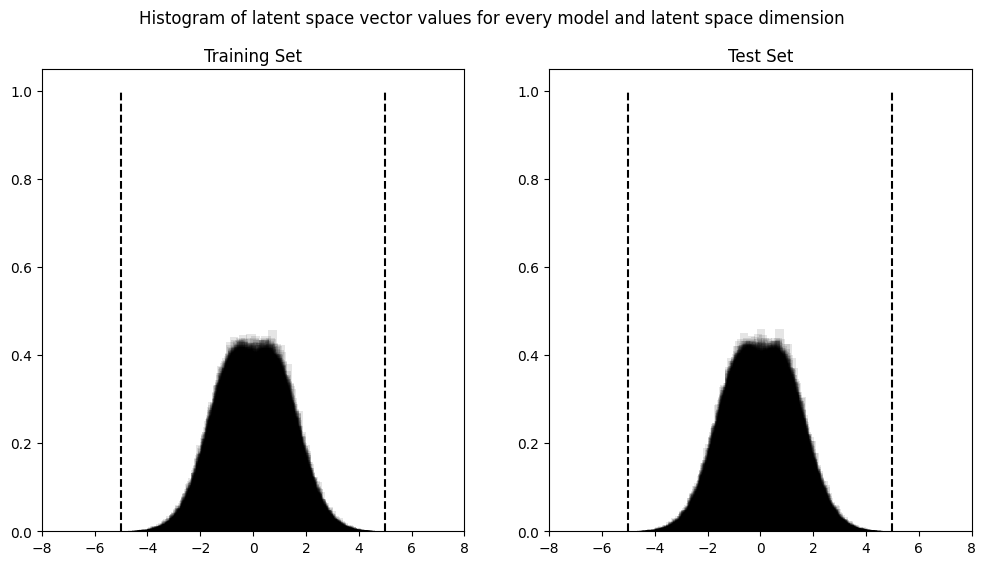

In [8]:
fig = plt.figure(figsize=(12,6))
grid = fig.add_gridspec(1,2)

percentages=[0,25,50,75,98]
properties = ["b","c","h", "bc", "bch", "predicted-log10mic"]

axes = []
for i in range(2):
    _ax = fig.add_subplot(grid[i])
    _ax.vlines(-5,0,1,linestyle="--", color="k")
    _ax.vlines( 5,0,1,linestyle="--", color="k")
    _ax.set_xlim([-8,8])
    axes.append(_ax)
axes[0].set_title("Training Set")
axes[1].set_title("Test Set")

fig.suptitle("Histogram of latent space vector values for every model and latent space dimension")

for _prop in properties:
    for _, _perc in enumerate(percentages):

        
        model_name = make_model_name(_prop,100,f"{_perc}")
    
        try:
            mu_train = np.load(f'analysis/{model_name}/mu_{model_name}_train.npy')
            mu_test  = np.load(f'analysis/{model_name}/mu_{model_name}_test.npy')
        except FileNotFoundError:
            print(f"did not find: analysis/{model_name}/mu_{model_name}_train.npy")
            continue
        
        for i, _data in enumerate([mu_train, mu_test]):
            for j in range(_data.shape[1]):
            
                axes[i].hist(
                    _data[:,j], 
                    bins=30, 
                    density=True,
                    alpha=0.1,
                    color="k"
                )
    
if SAVE_FIGURES:
    fig.savefig("figures/histogram_models_latent_spaces.svg",dpi=200)
    fig.savefig("figures/histogram_models_latent_spaces.png",dpi=200)


# mutual information between properties and predicted values

In [2]:
import pandas as pd

from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_regression

In [10]:
for _f in os.listdir('data/'):
    if "predicted" in _f:
        print(_f)

peptides_predicted-log10mic_zScoreNormalized_train.txt
peptides_predicted-log10mic_zScoreNormalized_test.txt
peptides_predicted_log10_mic_test.txt
peptides_predicted_log10_mic_train.txt


In [11]:
for _d in os.listdir("data/"):
    if os.path.isdir("data/"+_d):
        print(_d)

vocab
properties


In [12]:
os.listdir("data/properties/")

['peptides_2024_cdhit90_unbalanced_train_boman_chargepH7p2_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_hydrophobicity_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_train_chargepH7p2_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_train_hydrophobicity_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_chargepH7p2_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_boman_chargepH7p2_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_train_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_boman_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_train_boman_properties_zScoreNormalized.txt']

In [3]:
predicted_log10mic_train = pd.read_csv("data/peptides_predicted-log10mic_zScoreNormalized_train.txt")
predicted_log10mic_test  = pd.read_csv("data/peptides_predicted-log10mic_zScoreNormalized_test.txt")

properties_train = pd.read_csv("data/properties/peptides_2024_cdhit90_unbalanced_train_properties_zScoreNormalized.txt")
properties_test  = pd.read_csv("data/properties/peptides_2024_cdhit90_unbalanced_test_properties_zScoreNormalized.txt")

oracle_values_train = pd.read_csv("data/peptides_predicted_log10_mic_train.txt")
oracle_values_test  = pd.read_csv("data/peptides_predicted_log10_mic_test.txt")


In [4]:
properties_train.head()


,boman,charge(pH=7.2),hydrophobicity
0,2.758657,-0.024240,-2.009120
1,3.849545,0.196433,-4.014466
2,5.880969,0.398120,-4.014466
3,1.052996,-0.005255,-2.637661
4,-2.264774,-0.408404,2.779768


In [5]:
print(predicted_log10mic_train.shape, properties_train.shape)


(523848, 1) (523848, 3)


In [6]:
predicted_log10mic_train.head(2)

,predicted_mic
0,2.495141
1,1.250139


In [7]:
nan_mask = (~predicted_log10mic_train.predicted_mic.isna())

In [8]:
np.sum(~nan_mask)

61

In [17]:
for _nn in [3,6,10,20]:
    print(f"n_neighbours = {_nn}")
    print(
        mutual_info_regression(
            properties_train.loc[nan_mask], 
            predicted_log10mic_train.loc[nan_mask],
            n_neighbors=_nn,
            random_state=42
        )
    )

n_neighbours = 3


/home/jyler/projects/venvs/venv-protein-dl/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.02692299 0.09625698 0.02112208]
n_neighbours = 6


/home/jyler/projects/venvs/venv-protein-dl/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.02509042 0.09060501 0.02110883]
n_neighbours = 10


/home/jyler/projects/venvs/venv-protein-dl/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.0247652  0.08784039 0.02177626]
n_neighbours = 20


/home/jyler/projects/venvs/venv-protein-dl/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.02477367 0.08292976 0.02188072]


In [18]:
properties_train.head(2)

,boman,charge(pH=7.2),hydrophobicity
0,2.758657,-0.024240,-2.009120
1,3.849545,0.196433,-4.014466


In [20]:

for _prop in properties_train.columns:
    _temp_pr = []
    print()
    print(f"{_prop=} and predicted log10mic")
    for _ in range(5):
        _dataX = properties_train[ _prop].loc[nan_mask].to_numpy().flatten()
        _dataY = predicted_log10mic_train.loc[nan_mask].to_numpy().flatten()
        _subsample_indices = np.random.choice(list(range(len(_dataX))), size=10_000, replace=False)
        _temp = pearsonr(
            _dataX[_subsample_indices],
            _dataY[_subsample_indices]
        )
        print(_temp)
        _temp_pr.append(_temp.statistic)
    print(f"mean={np.mean(_temp_pr)}, StDev={np.std(_temp_pr)}")


_prop='boman' and predicted log10mic
PearsonRResult(statistic=-0.17372174208726804, pvalue=1.3533687537932895e-68)
PearsonRResult(statistic=-0.1509402460085577, pvalue=4.858413245216946e-52)
PearsonRResult(statistic=-0.14860251215381143, pvalue=1.77162994456001e-50)
PearsonRResult(statistic=-0.15252073173774133, pvalue=4.132447361116183e-53)
PearsonRResult(statistic=-0.1481469524897233, pvalue=3.5464815927270763e-50)
mean=-0.15478643689542035, StDev=0.009599959013365734

_prop='charge(pH=7.2)' and predicted log10mic
PearsonRResult(statistic=-0.31594678318399155, pvalue=1.2266520093040778e-230)
PearsonRResult(statistic=-0.29122629807302874, pvalue=1.0606064516872222e-194)
PearsonRResult(statistic=-0.2926765995238911, pvalue=1.031764912207269e-196)
PearsonRResult(statistic=-0.3068099532791074, pvalue=6.04478058159451e-217)
PearsonRResult(statistic=-0.3175163336259518, pvalue=4.867678766296349e-233)
mean=-0.3048351935371941, StDev=0.01114640622445372

_prop='hydrophobicity' and predicted

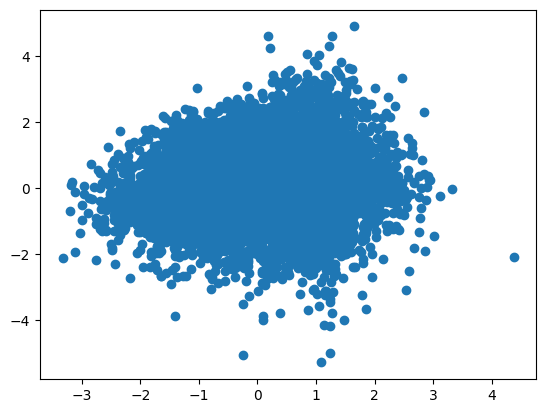

In [21]:
plt.scatter(
    predicted_log10mic_train.loc[nan_mask].iloc[_subsample_indices].values, 
    properties_train[ _prop].loc[nan_mask].iloc[_subsample_indices].values
)

# ProPy3

In [9]:
from propy import PyPro

def compute_selected_features(sequence: str) -> dict:
    DesObject = PyPro.GetProDes(sequence)
    features = {}

    features["tausw2"] = DesObject.GetSOCN()['tausw2']
    features["PolarizabilityC3"] = DesObject.GetCTD()['_PolarizabilityC3']
    features["ChargeT12"] = DesObject.GetCTD()['_ChargeT12']
    features["NormalizedVDWVC2"] = DesObject.GetCTD()['_NormalizedVDWVC2']
    features["PAAC20"] = DesObject.GetPAAC(lamda=4)['PAAC20']
    features["QSOSW39"] = DesObject.GetQSO()['QSOSW39']
    features["PAAC21"] = DesObject.GetPAAC(lamda=4)['PAAC21']
    features["MoreauBrotoAuto_Steric2"] = DesObject.GetMoreauBrotoAuto()['MoreauBrotoAuto_Steric2']
    features["ChargeD2100"] = DesObject.GetCTD()['_ChargeD2100']
    features["MoranAuto_Hydrophobicity5"] = DesObject.GetMoranAuto()['MoranAuto_Hydrophobicity5']

    return features


In [10]:
sequences = pd.read_csv("data/peptides_2024_cdhit90_unbalanced_train.txt")

In [20]:
sequences.iloc[10_000:10_005]

,peptides
10000,KRSKRKRRIHQRVRIS
10001,MAKFELPNLPTADDAL
10002,VDKPDYRPRPWPRPNM
10003,IISTIGDLVKWIIKTV
10004,AKNIQYFGAGTRLSVL


In [25]:
DesObject = PyPro.GetProDes("VDKPDYRPRPWPRPNM")
DesObject.GetMoranAuto()

{'MoranAuto_Hydrophobicity1': -0.329,
 'MoranAuto_Hydrophobicity2': -0.082,
 'MoranAuto_Hydrophobicity3': -0.044,
 'MoranAuto_Hydrophobicity4': -0.503,
 'MoranAuto_Hydrophobicity5': 0.828,
 'MoranAuto_Hydrophobicity6': -0.268,
 'MoranAuto_Hydrophobicity7': -0.084,
 'MoranAuto_Hydrophobicity8': -0.101,
 'MoranAuto_Hydrophobicity9': -0.688,
 'MoranAuto_Hydrophobicity10': 1.106,
 'MoranAuto_Hydrophobicity11': -0.194,
 'MoranAuto_Hydrophobicity12': -0.063,
 'MoranAuto_Hydrophobicity13': 0.155,
 'MoranAuto_Hydrophobicity14': -1.539,
 'MoranAuto_Hydrophobicity15': 1.826,
 'MoranAuto_Hydrophobicity16': 0.0,
 'MoranAuto_Hydrophobicity17': -0.0,
 'MoranAuto_Hydrophobicity18': -0.0,
 'MoranAuto_Hydrophobicity19': -0.0,
 'MoranAuto_Hydrophobicity20': -0.0,
 'MoranAuto_Hydrophobicity21': -0.0,
 'MoranAuto_Hydrophobicity22': -0.0,
 'MoranAuto_Hydrophobicity23': -0.0,
 'MoranAuto_Hydrophobicity24': -0.0,
 'MoranAuto_Hydrophobicity25': -0.0,
 'MoranAuto_Hydrophobicity26': -0.0,
 'MoranAuto_Hydrophobi

In [26]:
compute_selected_features("VDKPDYRPRPWPRPNM")

{'tausw2': 4.335,
 'PolarizabilityC3': 0.438,
 'ChargeT12': 0.467,
 'NormalizedVDWVC2': 0.125,
 'PAAC20': 4.044,
 'QSOSW39': 0.0,
 'PAAC21': 10.572,
 'MoreauBrotoAuto_Steric2': -0.184,
 'ChargeD2100': 100.0,
 'MoranAuto_Hydrophobicity5': 0.828}

In [115]:
results = {
    'sequence':[],
    'tausw2':[],
    'PolarizabilityC3': [],
    'ChargeT12': [],
    'NormalizedVDWVC2': [],
    'PAAC20': [],
    'QSOSW39': [],
    'PAAC21': [],
    'MoreauBrotoAuto_Steric2':[],
    'ChargeD2100': [],
    'MoranAuto_Hydrophobicity5':[]
}

In [ ]:
for i, _sequence in enumerate(sequences.peptides):
    results['sequence'].append(_sequence)
    
    try:
        _seq_results = compute_selected_features(_sequence)
    except Exception as e:
        print("failed on sequence =",i, _sequence)
        print("error:",e)
        results['tausw2'].append(np.nan)
        results['PolarizabilityC3'].append(np.nan)
        results['ChargeT12'].append(np.nan)
        results['NormalizedVDWVC2'].append(np.nan)
        results['PAAC20'].append(np.nan)
        results['QSOSW39'].append(np.nan)
        results['PAAC21'].append(np.nan)
        results['MoreauBrotoAuto_Steric2'].append(np.nan)
        results['ChargeD2100'].append(np.nan)
        results['MoranAuto_Hydrophobicity5'].append(np.nan)
        continue
        
    for k,v in _seq_results.items():
        results[k].append(v)


failed on sequence = 80 GGGGG
error: float division by zero
failed on sequence = 122 KKKKK
error: float division by zero
failed on sequence = 139 RKRKK
error: float division by zero
failed on sequence = 141 ASASA
error: float division by zero
failed on sequence = 184 RRRRRR
error: float division by zero
failed on sequence = 204 FFFFFF
error: float division by zero
failed on sequence = 264 KRRRRR
error: float division by zero
failed on sequence = 327 HKKHKK
error: float division by zero
failed on sequence = 349 KRKRRR
error: float division by zero
failed on sequence = 367 HHHHHH
error: float division by zero
failed on sequence = 406 KRKKRK
error: float division by zero
failed on sequence = 433 DDDDDD
error: float division by zero
failed on sequence = 590 RRRRRRR
error: float division by zero
failed on sequence = 631 FFFFFFF
error: float division by zero
failed on sequence = 716 DDDDDDD
error: float division by zero
failed on sequence = 734 KKKKKKK
error: float division by zero
failed on

In [11]:
import time

In [14]:
results_test = {
    'sequence':[],
    'tausw2':[],
}
t0 = time.time()
sequences_test = pd.read_csv("data/peptides_2024_cdhit90_unbalanced_test.txt")
for i, _sequence in enumerate(sequences_test.peptides):
    results_test['sequence'].append(_sequence)
    if i%100==0:
        tf = time.time()
        print(f"on {i}/{len(sequences_test)} | time elapsed = {tf-t0}s")
        t0 = tf

    try:
        DesObject = PyPro.GetProDes(_sequence)
    
        _tausw2_for_seq = DesObject.GetSOCN()['tausw2']
    except Exception as e:
        print("failed on sequence =",i, _sequence)
        print("error:",e)
        _tausw2_for_seq = np.nan

    results_test['tausw2'].append(_tausw2_for_seq)

on 0/141924 | time elapsed = 0.060257673263549805s
on 100/141924 | time elapsed = 0.003949642181396484s
on 200/141924 | time elapsed = 0.004110813140869141s
on 300/141924 | time elapsed = 0.0042002201080322266s
on 400/141924 | time elapsed = 0.004308462142944336s
on 500/141924 | time elapsed = 0.0044097900390625s
on 600/141924 | time elapsed = 0.004442453384399414s
on 700/141924 | time elapsed = 0.004479408264160156s
on 800/141924 | time elapsed = 0.0044252872467041016s
on 900/141924 | time elapsed = 0.004449605941772461s
on 1000/141924 | time elapsed = 0.0046539306640625s
on 1100/141924 | time elapsed = 0.004707813262939453s
on 1200/141924 | time elapsed = 0.0047833919525146484s
on 1300/141924 | time elapsed = 0.00498652458190918s
on 1400/141924 | time elapsed = 0.005025625228881836s
on 1500/141924 | time elapsed = 0.005048274993896484s
on 1600/141924 | time elapsed = 0.00512242317199707s
on 1700/141924 | time elapsed = 0.005075216293334961s
on 1800/141924 | time elapsed = 0.005312919

In [16]:
len(sequences_test)

141924

In [15]:
len(results_test['tausw2'])

141924

In [17]:
with open("data/tausw2_test.pkl","wb") as fobj:
    pkl.dump(results_test, fobj)

In [52]:
os.listdir("data/")

['peptides_train_to_mic.csv',
 'tausw2_test.pkl',
 'peptides_w_mic_train.txt',
 'peptides_2024_cdhit90_unbalanced_test.txt',
 'peptides_predicted-log10mic_zScoreNormalized_train.txt',
 'initialization_sets.pkl',
 'vocab',
 'single_point_initialization.pkl',
 'peptides_w_mic_test.txt',
 'properties',
 'peptides_2024_cdhit90_unbalanced_train.txt',
 'twenty_point_initialization.pkl',
 'peptides_predicted-log10mic_zScoreNormalized_test.txt',
 'peptides_predicted_log10_mic_test.txt',
 'ten_point_initialization.pkl',
 'fifty_point_initialization.pkl',
 'char_dict_peptides_2024_cdhit90_unbalanced.pkl',
 'char_weights_peptides_2024_cdhit90_unbalanced.npy',
 'top10_predict_mic_features.pkl',
 'peptides_2024_cdhit90_unbalanced_train_function.txt',
 'peptides_predicted_log10_mic_train.txt',
 'peptides_2024_cdhit90_unbalanced_test_function.txt']

In [13]:
with open("data/top10_predict_mic_features.pkl",'rb') as f:
    top10_features_train_set = pkl.load(f)

In [14]:
top10_features_train_set.keys()

dict_keys(['sequence', 'tausw2', 'PolarizabilityC3', 'ChargeT12', 'NormalizedVDWVC2', 'PAAC20', 'QSOSW39', 'PAAC21', 'MoreauBrotoAuto_Steric2', 'ChargeD2100', 'MoranAuto_Hydrophobicity5'])

In [15]:
len(top10_features_train_set['tausw2'])

523848

In [16]:
properties_train.head(1)

,boman,charge(pH=7.2),hydrophobicity
0,2.758657,-0.02424,-2.00912


In [34]:
properties_plus_tausw2_train = properties_train.copy()
properties_plus_tausw2_test  = properties_test.copy()

_tausw2_train = np.array(top10_features_train_set['tausw2'])
_tausw2_test  = np.array()

properties_plus_tausw2_train['tausw2'] = (_tausw2_train-np.mean(_tausw2_train[nan_mask]))/(np.std(_tausw2_train[nan_mask]))
properties_plus_tausw2_test[ 'tausw2'] = (_tausw2_test -np.mean(_tausw2_test[ nan_mask]))/(np.std(_tausw2_test[ nan_mask]))

properties_plus_tausw2_train["predicted-log10mic"] = predicted_log10mic_train.predicted_mic 
properties_plus_tausw2_test[ "predicted-log10mic"] = predicted_log10mic_test.predicted_mic


In [48]:
predicted_log10mic_train.head(3)

,predicted_mic
0,2.495141
1,1.250139
2,1.243709


In [21]:
for _feature in top10_features_train_set.keys():
    print(f"On {_feature=}")
    if _feature == "sequence":
        print("skipping")
        continue
    for _nn in [3,6,10,20]:
        print(f"n_neighbours = {_nn}")
        print(
            mutual_info_regression(
                properties_train.loc[nan_mask], 
                np.array(top10_features_train_set[_feature])[nan_mask],
                n_neighbors=_nn,
                random_state=42
            )
        )
    print()

On _feature='sequence'
skipping
On _feature='tausw2'
n_neighbours = 3
[0.12683966 0.21907747 0.11540584]
n_neighbours = 6
[0.12361889 0.19367533 0.11319206]
n_neighbours = 10
[0.12340659 0.17752082 0.11377002]
n_neighbours = 20
[0.12395413 0.15589524 0.11426684]

On _feature='PolarizabilityC3'
n_neighbours = 3
[0.11373943 0.36955132 0.43480841]
n_neighbours = 6
[0.10231111 0.33205139 0.18819944]
n_neighbours = 10
[0.0953921  0.30656711 0.12001551]
n_neighbours = 20
[0.08782746 0.27850988 0.09715164]

On _feature='ChargeT12'
n_neighbours = 3
[0.21836377 0.58986935 0.34672302]
n_neighbours = 6
[0.20634775 0.53499201 0.20224857]
n_neighbours = 10
[0.20028554 0.49807706 0.16671429]
n_neighbours = 20
[0.19416919 0.45667257 0.15000688]

On _feature='NormalizedVDWVC2'
n_neighbours = 3
[0.08284075 0.18783951 0.37057049]
n_neighbours = 6
[0.07207507 0.15800627 0.15813443]
n_neighbours = 10
[0.06548075 0.13856007 0.09622946]
n_neighbours = 20
[0.05711854 0.12362889 0.075869  ]

On _feature='PAAC

In [23]:
for _feature in top10_features_train_set.keys():
    print(f"On {_feature=}")
    if _feature == "sequence":
        print("skipping")
        continue
    for _nn in [20,40,60]:
        print(f"n_neighbours = {_nn}")
        print(
            mutual_info_regression(
                properties_train.loc[nan_mask], 
                np.array(top10_features_train_set[_feature])[nan_mask],
                n_neighbors=_nn,
                random_state=42
            )
        )
    print()

On _feature='sequence'
skipping
On _feature='tausw2'
n_neighbours = 20
[0.12395413 0.15589524 0.11426684]
n_neighbours = 40
[0.12419611 0.14408391 0.11438851]
n_neighbours = 60
[0.12413544 0.1379427  0.11449695]

On _feature='PolarizabilityC3'
n_neighbours = 20
[0.08782746 0.27850988 0.09715164]
n_neighbours = 40
[0.08287201 0.25791244 0.09026115]
n_neighbours = 60
[0.08291504 0.24916195 0.08947324]

On _feature='ChargeT12'
n_neighbours = 20
[0.19416919 0.45667257 0.15000688]
n_neighbours = 40
[0.18997403 0.42978226 0.14383653]
n_neighbours = 60
[0.19011357 0.41597476 0.14414904]

On _feature='NormalizedVDWVC2'
n_neighbours = 20
[0.05711854 0.12362889 0.075869  ]
n_neighbours = 40
[0.05489235 0.11351517 0.07115577]
n_neighbours = 60
[0.05505883 0.10676989 0.07113552]

On _feature='PAAC20'
n_neighbours = 20
[0.0822773  0.05308468 0.13150852]
n_neighbours = 40
[0.08188226 0.04879238 0.12859821]
n_neighbours = 60
[0.08155516 0.04704852 0.12706677]

On _feature='QSOSW39'
n_neighbours = 20


In [26]:
results={}
for _prop in properties_train.columns:
    print("==============================")
    print(f"{_prop=}")
    results[_prop]={}
    for _feature in top10_features_train_set.keys():
        _temp_pr = []
        # print(f"On {_feature=}")
        if _feature == "sequence":
            print("skipping")
            continue
        results[_prop][_feature] = {}
        # print(f"{_prop=} and {_feature=}")
        for _ in range(5):
            _dataX = properties_train[ _prop].loc[nan_mask].to_numpy().flatten()
            _dataY = np.array(top10_features_train_set[_feature])[nan_mask].flatten()
            _subsample_indices = np.random.choice(list(range(len(_dataX))), size=10_000, replace=False)
            _temp = pearsonr(
                _dataX[_subsample_indices],
                _dataY[_subsample_indices]
            )
            # print(_temp)
            _temp_pr.append(_temp.statistic)
        # print(f"{_prop=} and {_feature=}")
        # print(f"mean={np.mean(_temp_pr)}, StDev={np.std(_temp_pr)}")
        print(f"{_feature}, {round(np.mean(_temp_pr),4)} ({round(np.std(_temp_pr),4)})")
        results[_prop][_feature]['mean'  ]=np.mean(_temp_pr)
        results[_prop][_feature]['stddev']=np.std(_temp_pr)
        # print()

_prop='boman'
skipping
tausw2, 0.2719 (0.0075)
PolarizabilityC3, 0.3407 (0.0099)
ChargeT12, 0.5086 (0.0062)
NormalizedVDWVC2, -0.2826 (0.002)
PAAC20, -0.3355 (0.0069)
QSOSW39, 0.0373 (0.0084)
PAAC21, 0.4421 (0.009)
MoreauBrotoAuto_Steric2, -0.0021 (0.0043)
ChargeD2100, -0.2 (0.0173)
MoranAuto_Hydrophobicity5, -0.0467 (0.0152)
_prop='charge(pH=7.2)'
skipping
tausw2, 0.0215 (0.0108)
PolarizabilityC3, 0.5038 (0.0038)
ChargeT12, 0.6007 (0.0038)
NormalizedVDWVC2, -0.287 (0.0012)
PAAC20, -0.0906 (0.0041)
QSOSW39, -0.0041 (0.0063)
PAAC21, 0.2113 (0.0036)
MoreauBrotoAuto_Steric2, 0.0135 (0.0069)
ChargeD2100, -0.0382 (0.0111)
MoranAuto_Hydrophobicity5, 0.0152 (0.0116)
_prop='hydrophobicity'
skipping
tausw2, -0.273 (0.0058)
PolarizabilityC3, -0.3379 (0.0082)
ChargeT12, -0.4535 (0.0091)
NormalizedVDWVC2, 0.3297 (0.0139)
PAAC20, 0.4326 (0.013)
QSOSW39, -0.027 (0.0185)
PAAC21, -0.3609 (0.0098)
MoreauBrotoAuto_Steric2, -0.0249 (0.0132)
ChargeD2100, 0.1651 (0.0122)
MoranAuto_Hydrophobicity5, 0.0453 (